# Dataset analysis



In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.insert(0, Path(".").absolute().parent.as_posix())

In [3]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from common.dataset import TrainvalFilesDataset, TransformedDataset, read_image

In [4]:
dataset = TrainvalFilesDataset("/home/fast_storage/imaterialist-challenge-furniture-2018/train_400x400/")
img_dataset = TransformedDataset(dataset, transforms=lambda x: read_image(x), target_transforms=lambda y: y - 1)

Let's display few examples of all classes

In [5]:
n_samples = len(dataset)
indices = np.zeros((n_samples, 1), dtype=np.int)
y = np.zeros((n_samples,), dtype=np.int)

for i, dp in enumerate(dataset):
    y[i] = dp[1]
    indices[i, 0] = i

In [6]:
few_examples_per_class_indices = np.zeros((128, 3), dtype=np.int)
for i in range(1, 129):
    few_examples_per_class_indices[i - 1, :] = indices[y == i, 0][:3]

In [7]:
from image_dataset_viz import render_datapoint, DatasetExporter

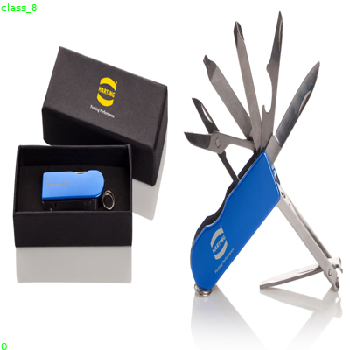

In [8]:
img, label = img_dataset[0]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(350, 350))

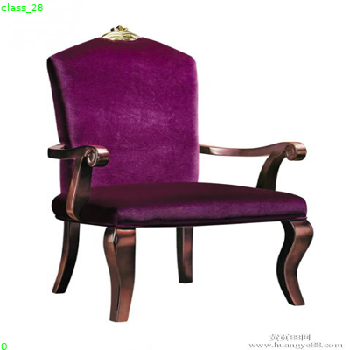

In [20]:
img, label = img_dataset[12]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(350, 350))

Export images as a single large image

In [14]:
def read_img_fn(index):
    return img_dataset[index][0]


def read_label_fn(index):
    return "class_{}".format(img_dataset[index][1])


de = DatasetExporter(read_img_fn, read_label_fn, 
                     img_id_fn=lambda x: str(x), 
                     max_output_img_size=(250, 250), 
                     n_cols=12,                    
                     text_color=(0, 255, 0), text_size=12)

In [15]:
idx = few_examples_per_class_indices.ravel().tolist()
de.export(idx, idx, "few_examples_per_class_viz")

100%|##########|384/384[00:07<00:00,53.58it/s] 


Similar classes:


In [ ]:
# chair_like_classes = [
#     0, 2, 3, 
# ]